In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import mannwhitneyu

In [47]:
df_eval = pd.read_csv("data/datos-evaluacion-clean.csv", sep=';')
df_eval

,Evaluado,Tiempo total,Tiempo primera fase,Tiempo segunda fase (total),Tiempo segunda fase JS,Tiempo segunda fase Python,Errores,Asistencias,Detalles
0,Victor Gomez,1:19:01,0:25:55,0:26:33,0:21:20,0:05:13,0,0,NaN
1,Jose Angel,1:30:37,0:27:32,0:31:32,0:23:51,0:07:41,1,0,NaN
2,Roberto,2:02:36,0:39:46,0:41:25,0:23:24,0:18:01,1,4,Problemas parseando JSON en Python.
3,Miguel Angel Sanchez Cifo,1:21:04,0:20:36,0:30:14,0:20:55,0:09:19,1,0,NaN
4,Jorge,1:26:24,0:14:42,0:35:51,0:30:30,0:05:21,0,5,NaN
5,Moya,0:54:10,0:15:34,0:19:18,0:14:06,0:05:12,1,2,NaN
6,Donate,1:01:26,0:14:24,0:23:31,0:17:27,0:06:04,0,2,NaN


In [48]:
df_eval.insert(3, 'time-first-phase', df_eval['Tiempo primera fase'].apply( lambda x: int(x.split(':')[1]) * 60 + int(x.split(':')[2]) ))

In [4]:
df_eval

,Evaluado,Tiempo total,Tiempo primera fase,time-first-phase,Tiempo segunda fase (total),Tiempo segunda fase JS,Tiempo segunda fase Python,Errores,Asistencias,Detalles
0,Victor Gomez,1:19:01,0:25:55,1555,0:26:33,0:21:20,0:05:13,0,0,NaN
1,Jose Angel,1:30:37,0:27:32,1652,0:31:32,0:23:51,0:07:41,1,0,NaN
2,Roberto,2:02:36,0:39:46,2386,0:41:25,0:23:24,0:18:01,1,4,Problemas parseando JSON en Python.
3,Miguel Angel Sanchez Cifo,1:21:04,0:20:36,1236,0:30:14,0:20:55,0:09:19,1,0,NaN
4,Jorge,1:26:24,0:14:42,882,0:35:51,0:30:30,0:05:21,0,5,NaN
5,Moya,0:54:10,0:15:34,934,0:19:18,0:14:06,0:05:12,1,2,NaN
6,Donate,1:01:26,0:14:24,864,0:23:31,0:17:27,0:06:04,0,2,NaN


In [49]:
df_eval.insert(6, 'time-second-phase', df_eval['Tiempo segunda fase Python'].apply( lambda x: int(x.split(':')[1]) * 60 + int(x.split(':')[2]) ))

In [50]:
df_eval

,Evaluado,Tiempo total,Tiempo primera fase,time-first-phase,Tiempo segunda fase (total),Tiempo segunda fase JS,time-second-phase,Tiempo segunda fase Python,Errores,Asistencias,Detalles
0,Victor Gomez,1:19:01,0:25:55,1555,0:26:33,0:21:20,313,0:05:13,0,0,NaN
1,Jose Angel,1:30:37,0:27:32,1652,0:31:32,0:23:51,461,0:07:41,1,0,NaN
2,Roberto,2:02:36,0:39:46,2386,0:41:25,0:23:24,1081,0:18:01,1,4,Problemas parseando JSON en Python.
3,Miguel Angel Sanchez Cifo,1:21:04,0:20:36,1236,0:30:14,0:20:55,559,0:09:19,1,0,NaN
4,Jorge,1:26:24,0:14:42,882,0:35:51,0:30:30,321,0:05:21,0,5,NaN
5,Moya,0:54:10,0:15:34,934,0:19:18,0:14:06,312,0:05:12,1,2,NaN
6,Donate,1:01:26,0:14:24,864,0:23:31,0:17:27,364,0:06:04,0,2,NaN


In [55]:
100*df_eval['time-first-phase'].std()/abs(df_eval['time-first-phase'].mean())

554.8723147844787

In [73]:
print('First Sample Data \navg = {:.2f} - sd = {:.2f} - RSD = {:.2f}%'.format(df_eval['time-first-phase'].mean(), df_eval['time-first-phase'].std(), 100*df_eval['time-first-phase'].std()/abs(df_eval['time-first-phase'].mean())))
print('Second Sample Data \navg = {:.2f} - sd = {:.2f} - RSD = {:.2f}%'.format(df_eval['time-second-phase'].mean(), df_eval['time-second-phase'].std(), 100*df_eval['time-second-phase'].std()/abs(df_eval['time-second-phase'].mean())))
mannwhitneyu(df_eval['time-first-phase'], df_eval['time-second-phase'])

First Sample Data 
avg = 1358.43 - sd = 554.87 - RSD = 40.85%
Second Sample Data 
avg = 487.29 - sd = 277.57 - RSD = 56.96%


MannwhitneyuResult(statistic=3.0, pvalue=0.003645179045767819)

In [8]:
df_eval.to_excel(r'./evaluation-data-seconds.xlsx')

In [23]:
from scipy import stats

def t_test(dataA, dataB, comparedData, hypothesis):
    N = len(dataA)
    ## Calculate the Standard Deviation
    #Calculate the variance to get the standard deviation
    #For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
    var_a = dataA.var(ddof=1)
    var_b = dataB.var(ddof=1)

    #std deviation
    s = np.sqrt((var_a + var_b)/2)
    ## Calculate the t-statistics
    t = (dataA.mean() - dataB.mean())/(s*np.sqrt(2/N))
    ## Compare with the critical t-value
    #Degrees of freedom
    df = 2*N - 2
    print('*****************T-TEST****************************')
    print("Null hypothesis: {}".format(hypothesis))
    print('Grados de libertad: {}'.format(df))
    #p-value after comparison with the t 
    p = 1 - stats.t.cdf(t,df=df)
    
    print("t = " + str(t))
    print("p = " + str(p))
    if(t < p):
        print("Null hypothesis is TRUE for the data '{}'".format(comparedData))
    else:
        print("Null hypothesis is FALSE for the data '{}'".format(comparedData))
    ## Cross Checking with the internal scipy function
    print('*****************(stats) T-TEST****************************')
    t2, p2 = stats.ttest_ind(dataA,dataB)
    print("t = " + str(t2))
    print("p = " + str(p2))
    
    if(t2 < p2):
        print("(CROSS CHECKING) Null hypothesis is TRUE for the data '{}'".format(comparedData))
    else:
        print("(CROSS CHECKING) Null hypothesis is FALSE for the data '{}'".format(comparedData))
    print('*****************T-TEST****************************')

*****************T-TEST****************************
Null hypothesis: Average of Tiempo duracion are not statistically different
Grados de libertad: 12
t = 3.7149024385292595
p = 0.0029542391420585012
Null hypothesis is FALSE for the data 'Tiempo duracion'
*****************(stats) T-TEST****************************
t = 3.71490243852926
p = 0.005908478284117036
(CROSS CHECKING) Null hypothesis is FALSE for the data 'Tiempo duracion'
*****************T-TEST****************************


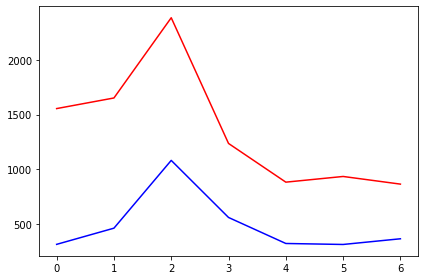

In [19]:
t_test(
    df_eval['time-first-phase'], 
    df_eval['time-second-phase'], 
    'Tiempo duracion', 
    'Average of {} are not statistically different'.format('Tiempo duracion')
)
plt.figure(figsize=(6, 4))
plt.plot(np.arange(len(df_eval['time-first-phase'])), df_eval['time-first-phase'], c='r')
plt.plot(np.arange(len(df_eval['time-second-phase'])), df_eval['time-second-phase'], c='b')
plt.tight_layout()
plt.show()

In [9]:
df_twelve = pd.read_csv("data/cuestionario-doce-dimensiones.csv", sep=';')
df_twelve

,Unnamed: 0,Abstracción,Aprendizaje,Carga de trabajo,Unidad de trabajo,Evaluación progresiva,Compromiso prematuro,Penetrabilidad,Elaboración de la API,Viscosidad de la API,Consistencia,Expresividad de roles,Correspondencia de dominio
0,Datos Medios (Si),"3,428571429","2,142857143",3,"3,428571429","2,285714286","2,857142857","4,428571429","2,142857143","1,714285714","4,428571429","4,428571429","4,428571429"
1,Datos Medios (No),"3,857142857","2,428571429","2,142857143","3,285714286","2,428571429","3,285714286","4,142857143","2,142857143","2,428571429","4,285714286","3,857142857","4,142857143"


In [10]:
df_twelve = df_twelve[df_twelve.columns.values[1:]]

In [13]:
df_twelve = df_twelve.apply(lambda x: x.apply(lambda u: float(u.replace(',','.'))), axis=1)

*****************T-TEST****************************
Null hypothesis: Average of Puntuaciones test are not statistically different
Grados de libertad: 22
t = 0.06206621489050631
p = 0.9510705381025455
Null hypothesis is TRUE for the data 'Puntuaciones test'
*****************(stats) T-TEST****************************
t = 0.0620662148905063
p = 1.902141076205091
(CROSS CHECKING) Null hypothesis is TRUE for the data 'Puntuaciones test'
*****************T-TEST****************************


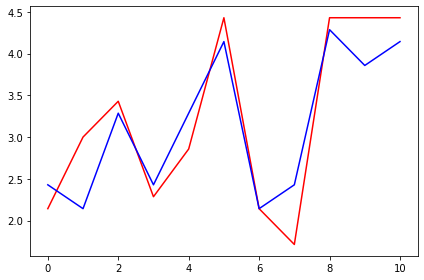

In [20]:
t_test(
    df_twelve.loc[0], 
    df_twelve.loc[1], 
    'Puntuaciones test', 
    'Average of {} are not statistically different'.format('Puntuaciones test')
)
plt.figure(figsize=(6, 4))
plt.plot(np.arange(len(df_twelve.loc[0][1:].values)), df_twelve.loc[0][1:].values, c='r')
plt.plot(np.arange(len(df_twelve.loc[1][1:].values)), df_twelve.loc[1][1:].values, c='b')
plt.tight_layout()
plt.show()